# Correlation and more data analisys

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns


In [2]:
# load dataset
pima = pd.read_csv("../diabetes.csv")

In [18]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
X = pima[feature_cols] # Features (independent variables)
y = pima.Outcome

In [19]:
X.describe()

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction,SkinThickness
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,79.799479,31.992578,33.240885,120.894531,69.105469,0.471876,20.536458
std,3.369578,115.244002,7.884160,11.760232,31.972618,19.355807,0.331329,15.952218
min,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,0.000000,27.300000,24.000000,99.000000,62.000000,0.243750,0.000000
50%,3.000000,30.500000,32.000000,29.000000,117.000000,72.000000,0.372500,23.000000
75%,6.000000,127.250000,36.600000,41.000000,140.250000,80.000000,0.626250,32.000000
max,17.000000,846.000000,67.100000,81.000000,199.000000,122.000000,2.420000,99.000000


In [20]:
y.describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [15]:
corr = X.corr()
X.corr()

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction,SkinThickness
Pregnancies,1.000000,-0.073535,0.017683,0.544341,0.129459,0.141282,-0.033523,-0.081672
Insulin,-0.073535,1.000000,0.197859,-0.042163,0.331357,0.088933,0.185071,0.436783
BMI,0.017683,0.197859,1.000000,0.036242,0.221071,0.281805,0.140647,0.392573
Age,0.544341,-0.042163,0.036242,1.000000,0.263514,0.239528,0.033561,-0.113970
Glucose,0.129459,0.331357,0.221071,0.263514,1.000000,0.152590,0.137337,0.057328
BloodPressure,0.141282,0.088933,0.281805,0.239528,0.152590,1.000000,0.041265,0.207371
DiabetesPedigreeFunction,-0.033523,0.185071,0.140647,0.033561,0.137337,0.041265,1.000000,0.183928
SkinThickness,-0.081672,0.436783,0.392573,-0.113970,0.057328,0.207371,0.183928,1.000000


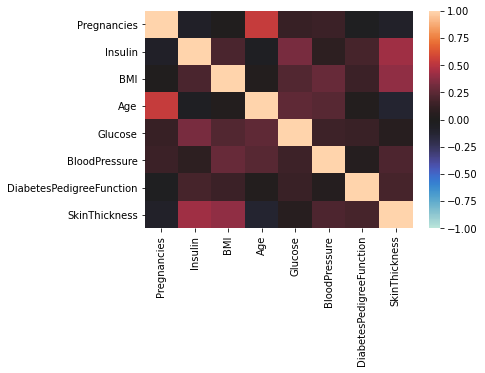

In [16]:
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
)

We can see, that taking all the independent variables, we don't have some big correlations, being the biggest one the Age/Pregnancies one.

## First Iteration

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [22]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict labels
y_pred=logreg.predict(X_test)

C:\Users\rober\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[109,  14],
       [ 29,  40]], dtype=int64)

In [26]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.7760416666666666
Precision: 0.7407407407407407
Recall: 0.5797101449275363
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



## Second iteration

Removing the two biggest correlation values, Age/Pregnancies and skinTickness/Insulin.

In [32]:
feature_cols = ['Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features (independent variables)

In [33]:
corr = X.corr()
X.corr()

,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
Insulin,1.000000,0.197859,-0.042163,0.331357,0.088933,0.185071
BMI,0.197859,1.000000,0.036242,0.221071,0.281805,0.140647
Age,-0.042163,0.036242,1.000000,0.263514,0.239528,0.033561
Glucose,0.331357,0.221071,0.263514,1.000000,0.152590,0.137337
BloodPressure,0.088933,0.281805,0.239528,0.152590,1.000000,0.041265
DiabetesPedigreeFunction,0.185071,0.140647,0.033561,0.137337,0.041265,1.000000


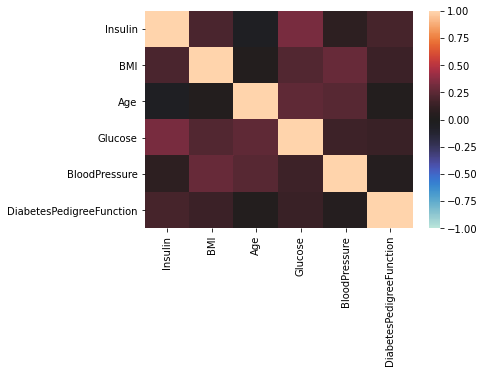

In [34]:
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict labels
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[109,  14],
       [ 28,  41]], dtype=int64)

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.78125
Precision: 0.7454545454545455
Recall: 0.5942028985507246
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       123
           1       0.75      0.59      0.66        69

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.77       192



Here we can see that we are getting slightly higher values in almost every metric.
Lets remove the next 2 highest correlation values.

## Third Iteration

Now, we have Insulin/Glucose and BMI/BloodPressure as the highest values, but let's remark that these values are already acceptable for a real analysis, here we will remove them just with the purpose of checking the behaviour of the regression model.

In [37]:
feature_cols = ['Insulin', 'BMI', 'Age','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features (independent variables)

In [38]:
corr = X.corr()
X.corr()

,Insulin,BMI,Age,DiabetesPedigreeFunction
Insulin,1.000000,0.197859,-0.042163,0.185071
BMI,0.197859,1.000000,0.036242,0.140647
Age,-0.042163,0.036242,1.000000,0.033561
DiabetesPedigreeFunction,0.185071,0.140647,0.033561,1.000000


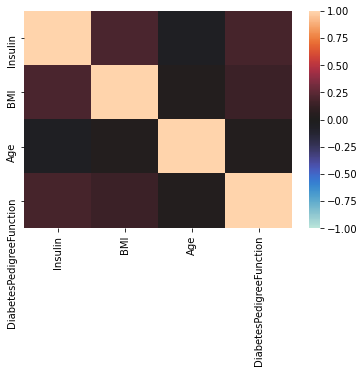

In [39]:
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict labels
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[105,  18],
       [ 35,  34]], dtype=int64)

In [41]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7239583333333334
Precision: 0.6538461538461539
Recall: 0.4927536231884058
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       123
           1       0.65      0.49      0.56        69

    accuracy                           0.72       192
   macro avg       0.70      0.67      0.68       192
weighted avg       0.72      0.72      0.71       192



As we said in the beggining, as these values were already small enough, now without them, all the metrics are lower than with them.

## Fourth Iteration

Now, lets see the behaviour removing the smallest values of correlation, and keeping the highest ones.

In [42]:
feature_cols = ['Pregnancies', 'Insulin','Glucose','BloodPressure','SkinThickness']
X = pima[feature_cols] # Features (independent variables)

In [43]:
corr = X.corr()
X.corr()

,Pregnancies,Insulin,Glucose,BloodPressure,SkinThickness
Pregnancies,1.000000,-0.073535,0.129459,0.141282,-0.081672
Insulin,-0.073535,1.000000,0.331357,0.088933,0.436783
Glucose,0.129459,0.331357,1.000000,0.152590,0.057328
BloodPressure,0.141282,0.088933,0.152590,1.000000,0.207371
SkinThickness,-0.081672,0.436783,0.057328,0.207371,1.000000


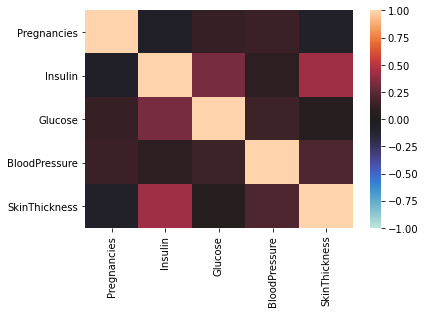

In [44]:
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict labels
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[109,  14],
       [ 30,  39]], dtype=int64)

In [46]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7708333333333334
Precision: 0.7358490566037735
Recall: 0.5652173913043478
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       123
           1       0.74      0.57      0.64        69

    accuracy                           0.77       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



We can see that wee are getting even better metrics than by removing more values that have a little higher correlation, becauset in this case we have a small quantity of total columns, so not all variables are very correlated to each other.